In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')
import os
%matplotlib notebook

In [2]:
medellin = pd.read_csv('/Users/andressilva/Desktop/MEDELLIN.csv',encoding='latin')
newyork  = pd.read_csv('/Users/andressilva/Desktop/newyork_.csv',encoding='latin')

In [3]:
medellin.head()

,Year,Population,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate
0,1965,5348000,98.5,2.4,5.4,NaN,40.0,50.7
1,1966,5383000,115.2,2.4,6.4,NaN,46.0,60.5
2,1967,5421000,127.6,2.8,7.6,NaN,52.0,65.2
3,1968,5437000,164.0,3.5,9.5,NaN,74.3,76.7
4,1969,5467000,187.9,3.5,10.8,NaN,90.6,82.9


In [4]:
medellin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       50 non-null     int64  
 1   Population                                 50 non-null     int64  
 2   Violent Crime rate                         50 non-null     float64
 3   Murder and nonnegligent manslaughter rate  50 non-null     float64
 4   Legacy rape rate /1                        50 non-null     float64
 5   Revised rape rate /2                       2 non-null      float64
 6   Robbery rate                               50 non-null     float64
 7   Aggravated assault rate                    50 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 3.2 KB


In [5]:
newyork.head()

,Year,Population,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate
0,1965,18073000,325.4,4.6,12.8,NaN,155.9,152.0
1,1966,18258000,342.6,4.8,13.4,NaN,164.8,159.6
2,1967,18336000,409.7,5.4,14.5,NaN,219.3,170.5
3,1968,18113000,543.9,6.5,14.0,NaN,330.5,192.9
4,1969,18321000,577.9,7.2,15.8,NaN,353.4,201.4


In [6]:
newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       50 non-null     int64  
 1   Population                                 50 non-null     int64  
 2   Violent Crime rate                         50 non-null     float64
 3   Murder and nonnegligent manslaughter rate  50 non-null     float64
 4   Legacy rape rate /1                        50 non-null     float64
 5   Revised rape rate /2                       2 non-null      float64
 6   Robbery rate                               50 non-null     float64
 7   Aggravated assault rate                    50 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 3.2 KB


In [8]:
MEDELLIN_cr = medellin['Violent Crime rate'].astype(np.float64)
newyork_cr = newyork['Violent Crime rate'].astype(np.float64)
MEDELLIN_cr.head(5)

0     98.5
1    115.2
2    127.6
3    164.0
4    187.9
Name: Violent Crime rate, dtype: float64

<IPython.core.display.Javascript object>


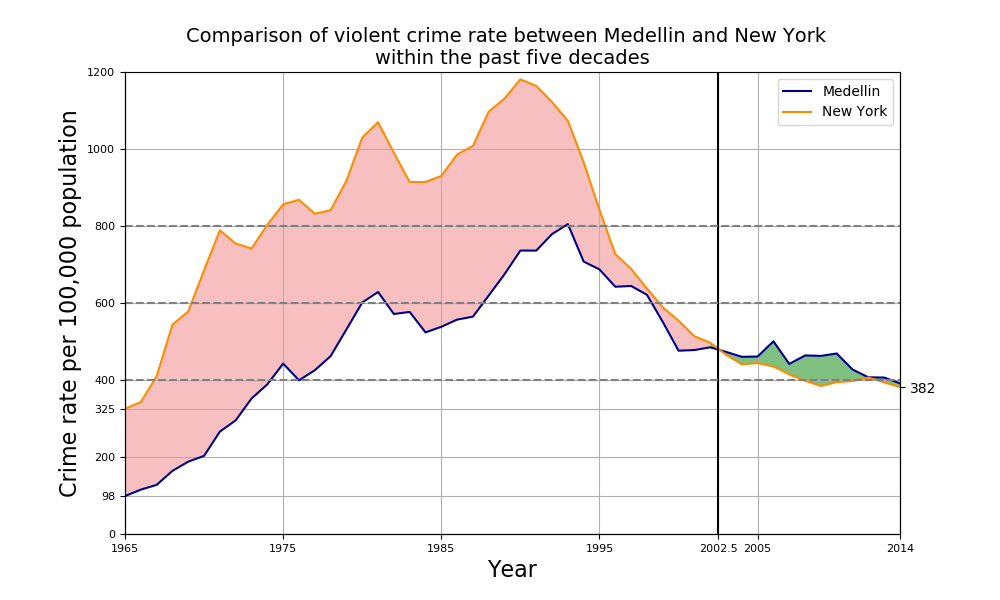

In [10]:
f = plt.figure(figsize=(10,6))
ax1 = f.add_subplot(111)
x_axis = np.arange(1965, 2015).astype(int)
ax1.plot(x_axis, MEDELLIN_cr.values, 'darkblue', label='Medellin')
ax1.plot(x_axis, newyork_cr.values, 'darkorange', label='New York')
ax1.fill_between(np.arange(1965, 2003).astype(int), MEDELLIN_cr.values[:38], newyork_cr.values[:38], facecolor='lightcoral', alpha=0.5)
ax1.fill_between(np.arange(2002, 2015).astype(int), MEDELLIN_cr.values[37:], newyork_cr.values[37:], facecolor='green', alpha=0.5)
plt.title('Comparison of violent crime rate between Medellin and New York  \nwithin the past five decades', size = 14)
plt.axis([1965,2014,0,800])
plt.xlabel('Year',size=16)
plt.ylabel('Crime rate per 100,000 population',size=16)
xticks = list(range(1965, 2005, 10)) + [2002.5] + list(range(2005, 2015, 10)) + [2014]
plt.xticks(xticks, [str(year) for year in xticks], rotation=0, fontsize=8)
plt.yticks([0, medellin_cr.values[0], newyork_cr.values[0]]+list(range(200,1201,200)), rotation=0, fontsize=8)

plt.axvline(x=2002.5, color='black', linestyle='-')
plt.axhline(y=400, color='gray', linestyle='--')
plt.axhline(y=600, color='gray', linestyle='--')
plt.axhline(y=800, color='gray', linestyle='--')
plt.legend(loc='best')
plt.grid()

ax = plt.gca()
ax.set_facecolor('w')

ax1.spines['top'].set_visible(False)
ax2 = ax1.twinx()
ax2.set_ylim(0,1200)
ax2.set_yticks([newyork_cr.values[-1]])